<a href="https://colab.research.google.com/github/lorenzophys/deep-learning-playground/blob/main/MNIST_fashion/MNIST_fashion_DNN_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST fashion DNN experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy.stats import norm

Loading the data from Keras.

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Check the shapes of the images.

In [5]:
print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


Normalization. Normally you should check, but I already know that the pixels range from 0 to 255.

In [6]:
train_images, test_images = train_images/255., test_images/255.

The name of the classes can be found here: https://github.com/zalandoresearch/fashion-mnist

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress','Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

A preview of the images:

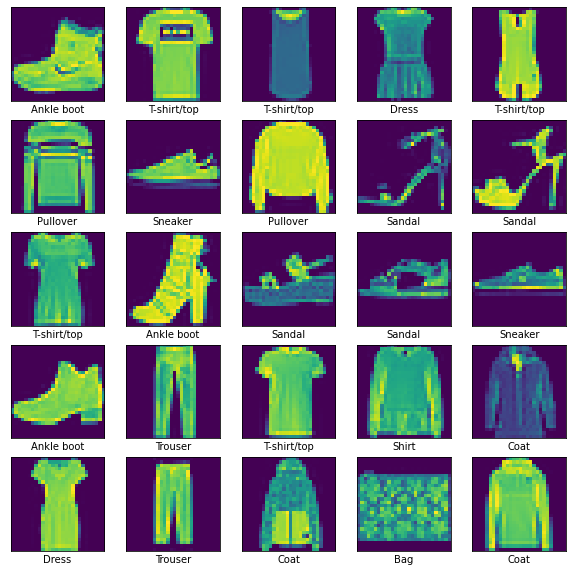

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i]])
plt.show()

I want to try different combinations to see which one gets the best accuracy. It will also be interesting to see what happens without a hidden layer.

For all the models I used the standard approach: adam optimizer, the sparse categorical crossentropy loss function, the relu activation for the first layers and the softmax for the output layer to encode probablility. For every model I want to check what's the maximum value of the accuracy on the training and validation set.

In [10]:
hidden_neurons = [0, 32, 64, 128, 256, 512, 1024]
model_1 = [0] * len(hidden_neurons)

In [11]:
for i in range(len(hidden_neurons)):
  model_1[i] = keras.models.Sequential()
  model_1[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  if i>0:
    model_1[i].add(keras.layers.Dense(hidden_neurons[i], activation="relu"))
  model_1[i].add(keras.layers.Dense(10, activation="softmax"))

  model_1[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [12]:
history_1 = [0] * len(hidden_neurons)
epochs_1 = 30

In [15]:
for i in range(len(hidden_neurons)):
  history_1[i] = model_1[i].fit(train_images, train_labels,
                                epochs=epochs_1,
                                validation_data=(test_images, test_labels),
                                verbose=0)
  
  max_acc = np.max(history_1[i].history['accuracy'])
  max_val_acc = np.max(history_1[i].history['val_accuracy'])
  
  print(f"Hidden neurons = {hidden_neurons[i]}, Max train acc = {max_acc:.5f}, Max val acc = {max_val_acc:.5f}")

Hidden neurons = 0, Max train acc = 0.87178, Max val acc = 0.84710
Hidden neurons = 32, Max train acc = 0.91633, Max val acc = 0.87750
Hidden neurons = 64, Max train acc = 0.93500, Max val acc = 0.88490
Hidden neurons = 128, Max train acc = 0.94700, Max val acc = 0.89180
Hidden neurons = 256, Max train acc = 0.95178, Max val acc = 0.89390
Hidden neurons = 512, Max train acc = 0.95572, Max val acc = 0.89650
Hidden neurons = 1024, Max train acc = 0.95490, Max val acc = 0.89570


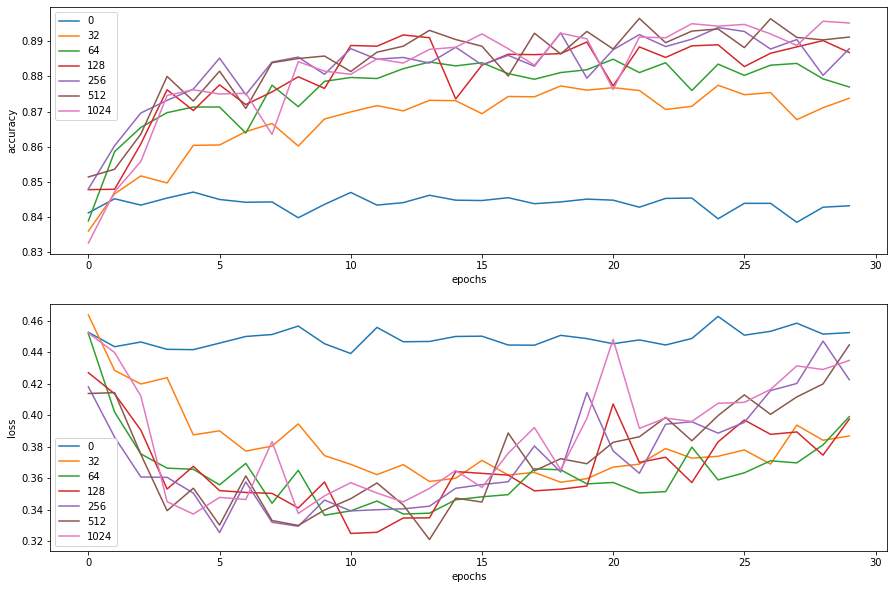

In [35]:
ax1, ax2 = plt.figure(figsize=(15,10)).subplots(2)

for i in range(len(hidden_neurons)):
  ax1.plot(history_1[i].history["val_accuracy"])
  ax2.plot(history_1[i].history["val_loss"])

ax1.set(xlabel='epochs', ylabel='accuracy')
ax1.legend(hidden_neurons)
ax2.set(xlabel='epochs', ylabel='loss')
ax2.legend(hidden_neurons)
plt.show()

It seems that 512 gives the best results. Let's see if another layer further improves the model.

In [24]:
second_hidden = [32, 64, 128, 256, 512, 1024]
model_2 = [0] * len(second_hidden)

In [25]:
for i in range(len(second_hidden)):
  model_2[i] = keras.models.Sequential()
  model_2[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  model_2[i].add(keras.layers.Dense(512, activation="relu"))
  model_2[i].add(keras.layers.Dense(second_hidden[i], activation="relu"))
  model_2[i].add(keras.layers.Dense(10, activation="softmax"))
  
  model_2[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [26]:
history_2 = [0] * len(second_hidden)
epochs_2 = 30

In [33]:
for i in range(len(second_hidden)):
  history_2[i] = model_2[i].fit(train_images, train_labels,
                                epochs=epochs_2,
                                validation_data=(test_images, test_labels),
                                verbose=0)
  
  max_acc_2 = np.max(history_2[i].history['accuracy'])
  max_val_acc_2 = np.max(history_2[i].history['val_accuracy'])

  print(f"DNN: 512-{second_hidden[i]}, Max train acc = {max_acc_2:.5f}, Max val acc = {max_val_acc_2:.5f}")

DNN: 512-32, Max train acc = 0.96620, Max val acc = 0.89600
DNN: 512-64, Max train acc = 0.95103, Max val acc = 0.89890
DNN: 512-128, Max train acc = 0.95328, Max val acc = 0.89480
DNN: 512-256, Max train acc = 0.95303, Max val acc = 0.89700
DNN: 512-512, Max train acc = 0.95405, Max val acc = 0.89740
DNN: 512-1024, Max train acc = 0.95315, Max val acc = 0.89390


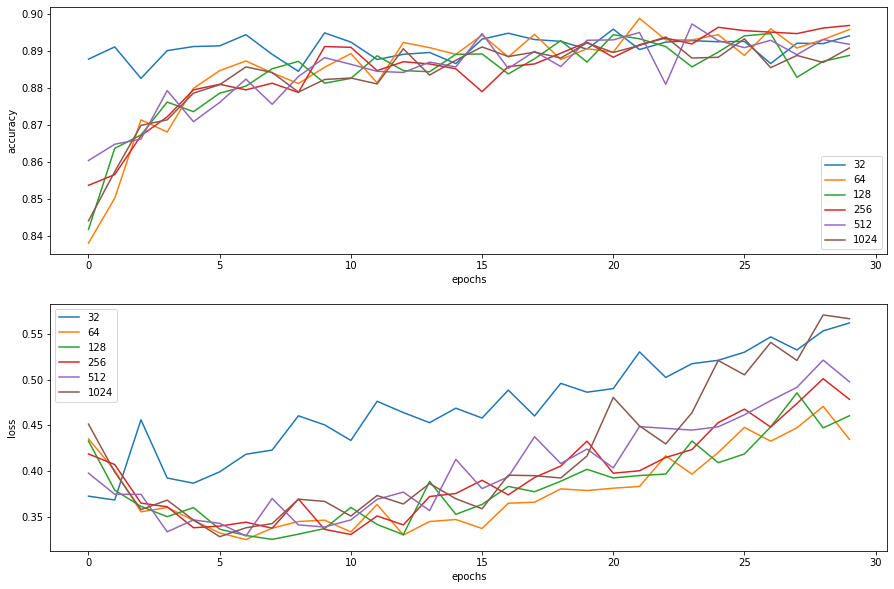

In [36]:
ax1, ax2 = plt.figure(figsize=(15,10)).subplots(2)

for i in range(len(second_hidden)):
  ax1.plot(history_2[i].history["val_accuracy"])
  ax2.plot(history_2[i].history["val_loss"])

ax1.set(xlabel='epochs', ylabel='accuracy')
ax1.legend(second_hidden)
ax2.set(xlabel='epochs', ylabel='loss')
ax2.legend(second_hidden)
plt.show()

I decided to proceed with a second hidden layer with 64 neurons. Now I'll try to reduce overfitting with some regularization. The simplest way is to add a couple of dropout layers, let's see which rate to use.

In [37]:
names_drop = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
nets_drop = len(names_drop)
model_drop = [0] * nets_drop
history_drop = [0] * nets_drop
epochs_drop = 30

In [38]:
for i in range(len(names_drop)):
  model_drop[i] = keras.models.Sequential()
  model_drop[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  model_drop[i].add(keras.layers.Dense(512, activation="relu"))
  model_drop[i].add(keras.layers.Dropout(0.1*(i+1)))
  model_drop[i].add(keras.layers.Dense(64, activation="relu"))
  model_drop[i].add(keras.layers.Dropout(0.1*(i+1)))
  model_drop[i].add(keras.layers.Dense(10, activation="softmax"))
  
  model_drop[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [39]:
for i in range(nets_drop):
  history_drop[i] = model_drop[i].fit(train_images, train_labels,
                                      epochs=epochs_drop,
                                      validation_data=(test_images, test_labels),
                                      verbose=0)
  
  max_acc_drop = np.max(history_drop[i].history['accuracy'])
  max_val_acc_drop = np.max(history_drop[i].history['val_accuracy'])

  print(f"Dropout: {names_drop[i]}, Max train accuracy = {max_acc_drop:.5f}, Max val accuracy = {max_val_acc_drop:.5f}")

Dropout: 0.1, Max train accuracy = 0.93360, Max val accuracy = 0.89520
Dropout: 0.2, Max train accuracy = 0.92035, Max val accuracy = 0.89720
Dropout: 0.3, Max train accuracy = 0.90895, Max val accuracy = 0.89310
Dropout: 0.4, Max train accuracy = 0.89720, Max val accuracy = 0.88750
Dropout: 0.5, Max train accuracy = 0.88203, Max val accuracy = 0.88080
Dropout: 0.6, Max train accuracy = 0.86200, Max val accuracy = 0.87680
Dropout: 0.7, Max train accuracy = 0.82947, Max val accuracy = 0.86530
Dropout: 0.8, Max train accuracy = 0.72353, Max val accuracy = 0.81810
Dropout: 0.9, Max train accuracy = 0.38140, Max val accuracy = 0.62490


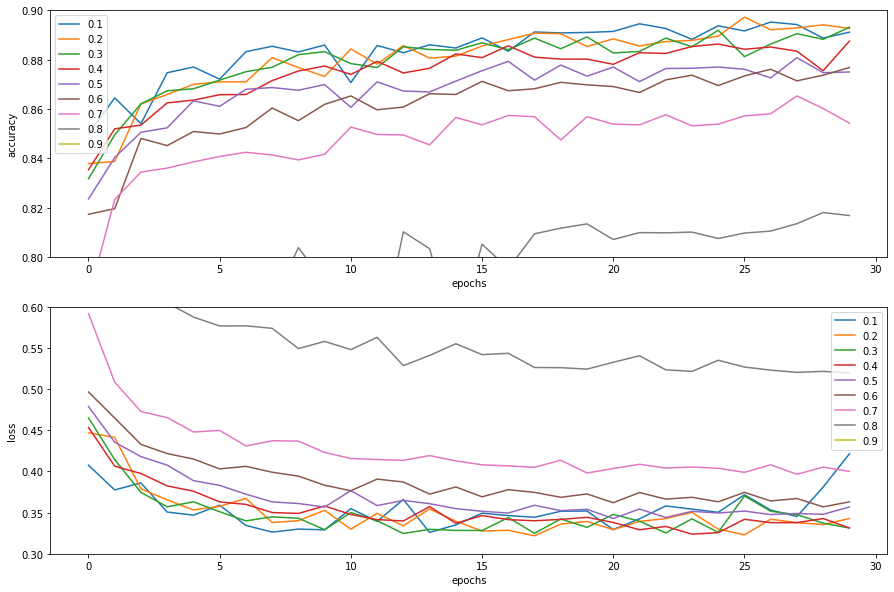

In [51]:
ax1, ax2 = plt.figure(figsize=(15,10)).subplots(2)

for i in range(len(names_drop)):
  ax1.plot(history_drop[i].history["val_accuracy"])
  ax2.plot(history_drop[i].history["val_loss"])

ax1.set(xlabel='epochs', ylabel='accuracy')
ax1.set_ylim([0.80, 0.90])
ax1.legend(names_drop)
ax2.set(xlabel='epochs', ylabel='loss')
ax2.set_ylim([0.30, 0.60])
ax2.legend(names_drop)

plt.show()

As expected, adding dropout visibly improved the model. Now let's consider the best model and see how an ensemble performs.

In [54]:
model_best = [0] * 100

In [56]:
for i in range(100):
  model_best[i] = keras.models.Sequential()
  model_best[i].add(keras.layers.Flatten(input_shape=(28, 28)))
  model_best[i].add(keras.layers.Dense(512, activation="relu"))
  model_best[i].add(keras.layers.Dropout(0.2))
  model_best[i].add(keras.layers.Dense(64, activation="relu"))
  model_best[i].add(keras.layers.Dropout(0.2))
  model_best[i].add(keras.layers.Dense(10, activation="softmax"))
  
  model_best[i].compile(optimizer="adam",
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

In [59]:
history_best = [0] * 100
epochs_best = 25
best_accuracy = []

In [ ]:
for i in range(100):
  history_best[i] = model_best[i].fit(train_images, train_labels,
                                      epochs=epochs_best,
                                      validation_data=(test_images, test_labels),
                                      verbose=0)
  
  best_accuracy.append(np.max(history_best[i].history['val_accuracy']))
  print(f"{i} Best accuracy: {np.max(history_best[i].history['val_accuracy'])}")

mu = 0.8934, std = 0.0018


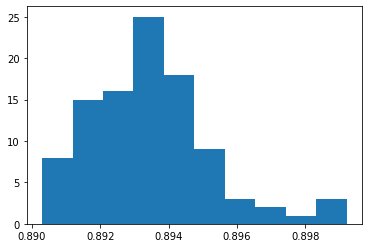

In [61]:
mu, std = norm.fit(best_accuracy)
print(f"mu = {mu:.4f}, std = {std:.4f}")
plt.hist(best_accuracy, bins=10)
plt.show()

For this problem a deep network 784-512-64-10 has an average accuracy of 89.34% with a standard deviation of 1.8e-3.